# Tarea 1: Ejercicios de prácticas

* Autor: Jorge Cabrera Rodríguez
* Email: alu0101351773@ull.edu.es
* Fecha: 9/10/2023
* Repo: [click aquí](https://github.com/alu0101351773/PD_practicas.git)

## Ejercicios de _python_

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

DATA_DIR = '/content/gdrive/My Drive/Colab Notebooks/Preprocesado de datos_2023_24/data'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Introducción a python

Cargar el fichero de Sentry: Earth Impact Monitoring que están en "cneos_sentry_summary_data.csv" (Fuente: [Center for Near Earth Object Studies - NASA](https://cneos.jpl.nasa.gov/sentry/#legend)).Calcular:

- Probabilidad media de que impacte algún objeto en la Tierra.
- Diámetro máximo de los objetos recogidos en la base de datos.
- Rango medio de años en formato `[min_year, max_year]`.
- Nombre del objeto que viaja a mayor velocidad.

#### Lectura de fichero y creación de estructura de datos

In [14]:
# Creación de estructura de datos
dataset = []

# Lectura de fichero
with open(f'{DATA_DIR}/cneos_sentry_summary_data.csv', 'r') as file:
    # Lectura de cabecera
    header = file.readline().strip().split(',')
    # Lectura de datos
    for line in file:
        line = line.strip()
        line = [val.removeprefix('"').removesuffix('"') for val in line.split(',')]
        dataset.append({
            'Object Designation': line[0],
            'Year Range': [int(value) for value in line[1].split('-')],
            'Potential Impacts': int(line[2]),
            'cum Impact Probability': float(line[3]),
            'V_infinity': float(line[4]),
            'H': float(line[5]),
            'Estimated Diameter': float(line[6]),
            'cum Palermo Scale': float(line[7]),
            'max Palermo Scale': float(line[8]),
            'max Torino Scale': int(line[9]) if line[9] != '' else 0,
        })

#### Probabilidad media de que impacte algún objeto en la tierra

In [9]:
impact_probability = sum([row['cum Impact Probability'] for row in dataset]) / len(dataset)

print(f'Probabilidad media de impacto: {impact_probability * 100:.4f}%')

Probabilidad media de impacto: 0.8538%


#### Diámetro máximo de los objetos recogidos

In [10]:
max_diameter = max([row["Estimated Diameter"] for row in dataset])

print(f'Diametro maximo de objetos: {max_diameter} Km')

Diametro maximo de objetos: 1.3 Km


#### Rango medio de años en formato `[min_year, max_year]`

In [11]:
lower_bound = sum(row['Year Range'][0] for row in dataset) / len(dataset)
upper_bound = sum(row['Year Range'][1] for row in dataset) / len(dataset)

years_range = [round(lower_bound), round(upper_bound)]

print(f'Rango medio de años: {years_range}')

Rango medio de años: [2095, 2138]


#### Nombre del objeto que viaja a mayor velocidad

In [12]:
fastest_item = max(
    dataset,
    key = lambda x: x.get('V_infinity')
)

print(f'Objeto mas veloz del conjunto de datos: {fastest_item["Object Designation"]}')

Objeto mas veloz del conjunto de datos: (2005 ED224)


### La librería _pandas_

Para el conjunto de datos de apps de Google Play 'googleplaystore.csv':

- Crear un dataframe a partir del csv 'googleplaystore.csv'
- Obtener el tipo de todas las columnas
- Comprobar el número de valores nulos que tienen las columnas
- Obtener el número de apps que no tienen ninguna review

#### Crear un dataframe a partir del csv 'googleplaystore.csv'

In [15]:
import pandas as pd

dataset = pd.read_csv(f'{DATA_DIR}/googleplaystore.csv')

display(dataset)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#### Obtener el tipo de todas las columnas

In [16]:
display(dataset.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Comprobar el número de valores nulos que tienen las columnas

In [17]:
display(dataset.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### Obtener el número de apps que no tienen ninguna review

In [18]:
unreviewed_apps = dataset['Reviews'].value_counts()['0']

print(f'Numero de apps sin review: {unreviewed_apps}')

Numero de apps sin review: 596


### _matplotlib_ y _plotly_

Para el conjunto de datos de apps de Google Play 'googleplaystore.csv':

- Realizar un gráfico histograma de la variable "Rating" de las apps
- Realizar un diagrama de barras de la variable "Category" de las apps
- Realizar un gráfico de dispersión de "Rating" vs "Reviews"
- (OPCIONAL) Realizar otro gráfico de los vistos anteriormente utilizando otras variables del dataset.

#### Realizar un gráfico histograma de la variable "Rating" de las apps

In [21]:
import pandas as pd

dataset = pd.read_csv(f'{DATA_DIR}/googleplaystore.csv')
dataset.drop(dataset[dataset.Category == '1.9'].index, inplace=True)

display(dataset)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


Text(0, 0.5, 'Frecuencia')

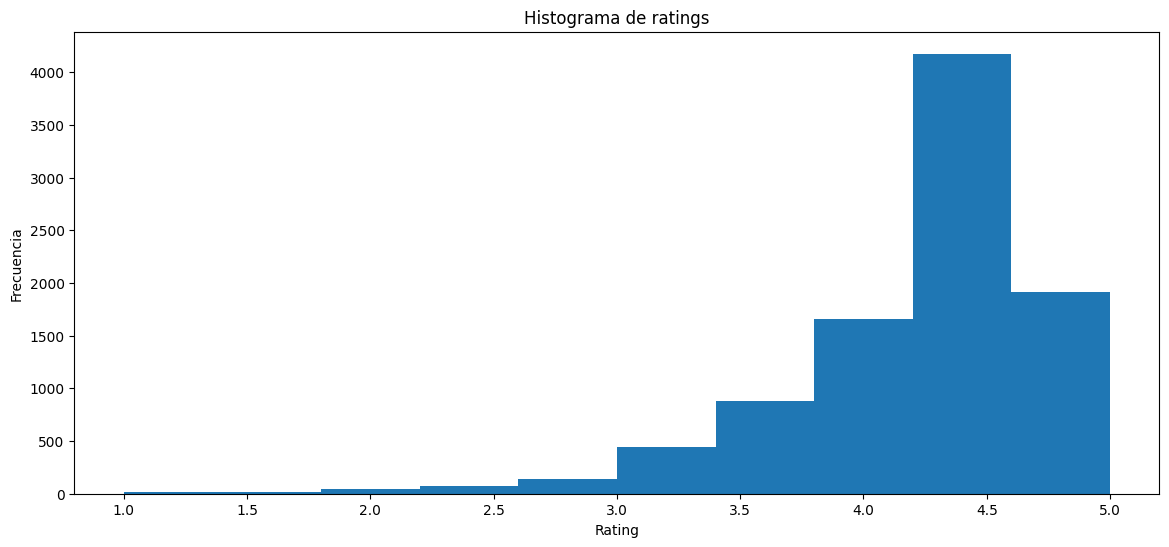

In [22]:
import matplotlib.pyplot as plt

dataset.Rating.plot(
    kind='hist',
    figsize=(14, 6),
    title='Histograma de ratings'
)

# Decoracion del histograma
plt.title('Histograma de ratings')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')

#### Realizar un diagrama de barras de la variable "Category" de las apps

[]

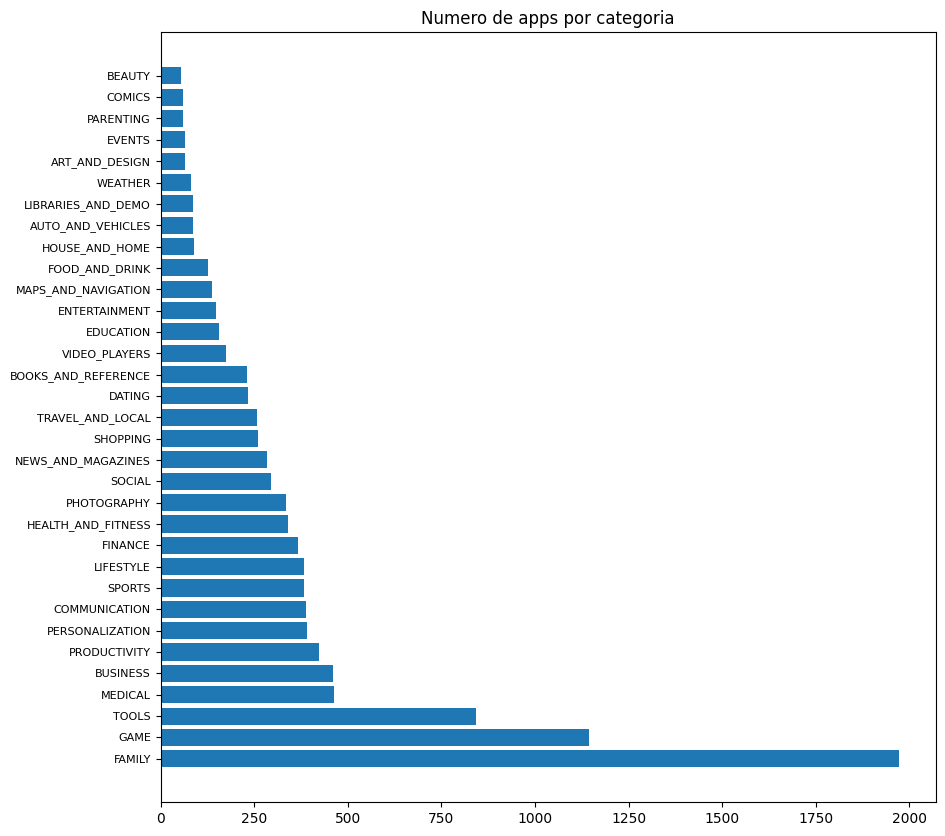

In [24]:
# Creacion de la figura
# * Debe ser barh en vez de bar para permitir que se lean las categorias
fig, ax = plt.subplots()

fig.set_size_inches(10, 10)

plt.barh(
    dataset['Category'].value_counts().keys(),
    dataset['Category'].value_counts().values,
)

# Decoracion de la figura
plt.title('Numero de apps por categoria')
plt.yticks(size = 8)

plt.plot()

#### Realizar un gráfico de dispersión de "Rating" vs "Reviews"

<Axes: xlabel='Rating', ylabel='Reviews'>

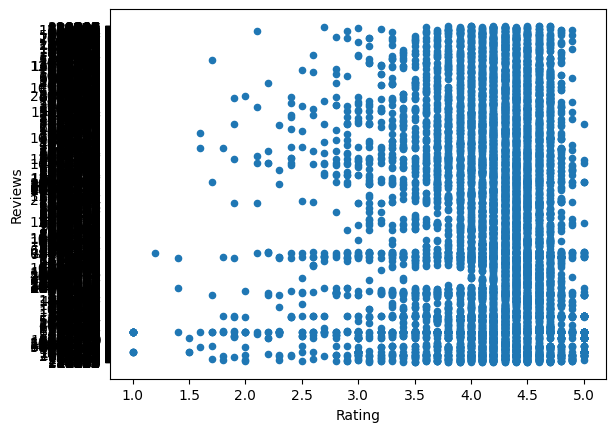

In [25]:
# Obtener los valores de las columnas
dataset.plot(
    kind = 'scatter',
    x = 'Rating',
    y = 'Reviews'
)

#### Realizar otro gráfico de los vistos anteriormente utilizando otras variables del dataset.

[]

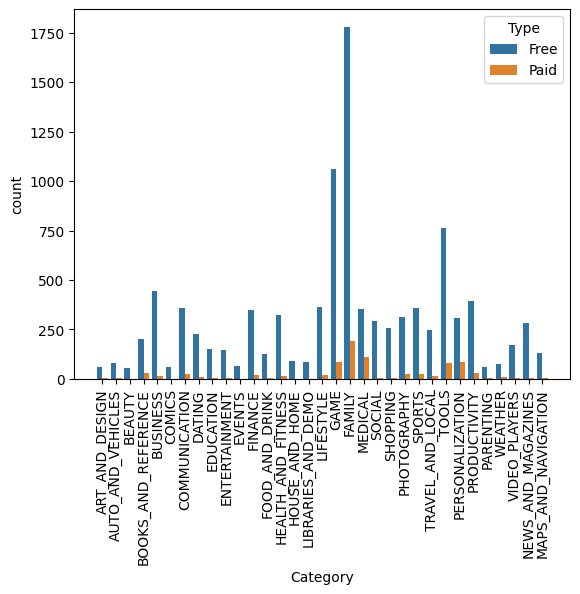

In [26]:
import seaborn as sns

sns.countplot(
    data = dataset,
    x = 'Category',
    hue = 'Type'
)
plt.xticks(rotation = 90)
plt.plot()

## Ejercicios de _R_

In [28]:
#!pip install rpy2==3.5.1
%load_ext rpy2.ipython

### Introducción a R

- Crear un OBJETO llamado _OBJETO_ definido como el resultado de la suma: 5 + 6
- Crear un VECTOR _VEC0_ que contenga los números 1, 3, 4.
- Crear 3 vectores ( _VEC1_, _VEC2_, _VEC3_) que sean transformaciones del anterior
- Crear 3 vectores con la misma cantidad de elementos que VEC0, pero con variables string (texto) ( _VEC4_, _VEC5_, _VEC6_).
- Crear un dataframe _DFRAME_ como combinación de todos los __vectores__ creados previamente

#### Crear un OBJETO llamado OBJETO definido como el resultado de la suma: 5 + 6

In [29]:
%%R

OBJETO <- (5 + 6)
OBJETO

[1] 11


#### Crear un VECTOR _VEC0_ que contenga los números 1, 3, 4

In [30]:
%%R

VEC0 <- c(1, 3, 4)
VEC0

[1] 1 3 4


#### Crear 3 vectores ( _VEC1_, _VEC2_, _VEC3_) que sean transformaciones del anterior

In [31]:
%%R

VEC1 <- VEC0 * 2
VEC2 <- VEC0 + 5
VEC3 <- VEC0 + VEC2

VEC1
VEC2
VEC3

[1]  7 11 13


#### Crear 3 vectores con la misma cantidad de elementos que VEC0, pero con variables string (texto) ( _VEC4_, _VEC5_, _VEC6_)

In [32]:
%%R

VEC4 <- c('Pepe', 'Luis', 'Juan')
VEC5 <- c('Ana', 'Marta', 'Martina')
VEC6 <- c('Sam', 'Louis', 'Artey')

#### Crea un dataframe DFRAME como combinación de todos los **vectores** creados previamente

In [33]:
%%R

DFRAME <- data.frame(
    VEC0,
    VEC1,
    VEC2,
    VEC3,
    VEC4,
    VEC5,
    VEC6
)
DFRAME

  VEC0 VEC1 VEC2 VEC3 VEC4    VEC5  VEC6
1    1    2    6    7 Pepe     Ana   Sam
2    3    6    8   11 Luis   Marta Louis
3    4    8    9   13 Juan Martina Artey


### Librerías de manipulación de datos

- Leer del archivo EXCEL "Canarias_poblacion.xls" la hoja 2019 y cargar en un data.frame llamado "can_pob_2019". Pueden usar la función _read.xlsx_ de cualquiera de las siguientes librerías:
    - Vista en clase: __openxlsx__
    - Otra opción que utiliza otros parametros: __readxl__
- Cargar ahora las dos hojas restantes (2018 y 2017) en crear un único data.frame "can_pob" con filas los municipios y columnas los 3 años.
- A partir del data.frame "can_pob" crear un vector llamado __Variables__ que contenga los nombres de las variables.
- Calcular una variable "porcentaje_pob" que sea el porcentaje de población de cada municipio sobre la población total de Canarias.
- Filtras las islas de la provincia de Las Palmas.
- Encontrar los municipios con menos del 30% de población.
- Grabar los resultados en un excel

#### Leer del archivo EXCEL `Canarias_poblacion.xls` la hoja 2019 y cargar en un `data.frame` llamado `can_pob_2019`

In [34]:
%%R

install.packages('openxlsx')

library(openxlsx)
library(tidyverse)
library(readxl)

(as ‘lib’ is unspecified)














	‘/tmp/RtmpwRPyFV/downloaded_packages’



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [35]:
%%R

data <- read_xls(
    path = '/content/gdrive/My Drive/Colab Notebooks/Preprocesado de datos_2023_24/data/Canarias_poblacion.xls',
    sheet = '2019'
)
can_pob_2019 <- data.frame(data)
head(can_pob_2019)

       Isla     Municipio Población
1 LANZAROTE      Arrecife     62988
2 LANZAROTE         Haría      5123
3 LANZAROTE San Bartolomé     18816
4 LANZAROTE       Teguise     22342
5 LANZAROTE          Tías     20170
6 LANZAROTE        Tinajo      6279


#### Cargar ahora las dos hojas restantes (2018 y 2017) en crear un único `data.frame` `can_pob` con filas los municipios y columnas los 3 años

In [38]:
%%R

data <- read_xls(
    path = '/content/gdrive/My Drive/Colab Notebooks/Preprocesado de datos_2023_24/data/Canarias_poblacion.xls',
    sheet = '2018'
)
can_pob_2018 <- data.frame(data)
head(can_pob_2018)

       Isla     Municipio Población
1 LANZAROTE      Arrecife     61351
2 LANZAROTE         Haría      4969
3 LANZAROTE San Bartolomé     18327
4 LANZAROTE       Teguise     22122
5 LANZAROTE          Tías     20006
6 LANZAROTE        Tinajo      6119


In [40]:
%%R

data <- read_xls(
    path = '/content/gdrive/My Drive/Colab Notebooks/Preprocesado de datos_2023_24/data/Canarias_poblacion.xls',
    sheet = '2017'
)
can_pob_2017 <- data.frame(data)
head(can_pob_2017)

       Isla     Municipio Población
1 LANZAROTE      Arrecife     59771
2 LANZAROTE         Haría      4858
3 LANZAROTE San Bartolomé     18249
4 LANZAROTE       Teguise     21896
5 LANZAROTE          Tías     19964
6 LANZAROTE        Tinajo      6028


In [41]:
%%R

can_pob <- can_pob_2017 %>%
    left_join(., can_pob_2018, by = 'Municipio') %>%
    left_join(., can_pob_2019, by = 'Municipio') %>%
    select(Isla.x, Municipio, Población.x, Población.y, Población) %>%
    rename(
        'Isla' = Isla.x,
        'Pob_2017' = Población.x,
        'Pob_2018' = Población.y,
        'Pob_2019' = Población
    )

head(can_pob)

       Isla     Municipio Pob_2017 Pob_2018 Pob_2019
1 LANZAROTE      Arrecife    59771    61351    62988
2 LANZAROTE         Haría     4858     4969     5123
3 LANZAROTE San Bartolomé    18249    18327    18816
4 LANZAROTE       Teguise    21896    22122    22342
5 LANZAROTE          Tías    19964    20006    20170
6 LANZAROTE        Tinajo     6028     6119     6279


#### A partir del `data.frame` `can_pob` crear un vector llamado __Variables__ que contenga los nombres de las variables

In [42]:
%%R

variables <- colnames(can_pob)
variables

[1] "Isla"      "Municipio" "Pob_2017"  "Pob_2018"  "Pob_2019" 


#### Calcular una variable **porcentaje_pob** que sea el porcentaje de población de cada municipio sobre la población total de Canarias

Pese a que el resto de ejercicios han sido intuitivos y claros, en este al no indicar el año del que se desea hacer el porcentaje he decidido mostrarlo de todos los años que disponemos, generando una columna por año:

* `Porcentaje_pob_2017`
* `Porcentaje_pob_2018`
* `Porcentaje_pob_2019`

In [45]:
%%R

can_pob <- can_pob %>%
    mutate(Porcentaje_pob_2017 = (Pob_2017 / sum(Pob_2017)) * 100) %>%
    mutate(Porcentaje_pob_2018 = (Pob_2018 / sum(Pob_2018)) * 100) %>%
    mutate(Porcentaje_pob_2019 = (Pob_2019 / sum(Pob_2019)) * 100)

head(can_pob)

       Isla     Municipio Pob_2017 Pob_2018 Pob_2019 Porcentaje_pob_2017
1 LANZAROTE      Arrecife    59771    61351    62988           2.8352737
2 LANZAROTE         Haría     4858     4969     5123           0.2304422
3 LANZAROTE San Bartolomé    18249    18327    18816           0.8656524
4 LANZAROTE       Teguise    21896    22122    22342           1.0386501
5 LANZAROTE          Tías    19964    20006    20170           0.9470045
6 LANZAROTE        Tinajo     6028     6119     6279           0.2859418
  Porcentaje_pob_2018 Porcentaje_pob_2019
1           2.8834625           2.9250637
2           0.2335402           0.2379041
3           0.8613587           0.8737855
4           1.0397216           1.0375274
5           0.9402708           0.9366631
6           0.2875896           0.2915869


#### Filtras las islas de la provincia de Las Palmas

In [46]:
%%R

can_pob <- can_pob %>%
    filter(Isla == 'LANZAROTE' | Isla == 'GRANCANARIA' | Isla == 'FUERTEVENTURA')

head(can_pob)

       Isla     Municipio Pob_2017 Pob_2018 Pob_2019 Porcentaje_pob_2017
1 LANZAROTE      Arrecife    59771    61351    62988           2.8352737
2 LANZAROTE         Haría     4858     4969     5123           0.2304422
3 LANZAROTE San Bartolomé    18249    18327    18816           0.8656524
4 LANZAROTE       Teguise    21896    22122    22342           1.0386501
5 LANZAROTE          Tías    19964    20006    20170           0.9470045
6 LANZAROTE        Tinajo     6028     6119     6279           0.2859418
  Porcentaje_pob_2018 Porcentaje_pob_2019
1           2.8834625           2.9250637
2           0.2335402           0.2379041
3           0.8613587           0.8737855
4           1.0397216           1.0375274
5           0.9402708           0.9366631
6           0.2875896           0.2915869


#### Encontrar los municipios con menos del 30% de población

Si filtramos estrictamente los municipios con menos del 30% de la población **global** de canarias, como se nos pide en el enunciado, veremos que obtendremos todos los municipios originales.

In [47]:
%%R

paralel_can_pob <- can_pob

can_pob <- can_pob %>%
    filter(Porcentaje_pob_2019 < 30)

head(can_pob)

       Isla     Municipio Pob_2017 Pob_2018 Pob_2019 Porcentaje_pob_2017
1 LANZAROTE      Arrecife    59771    61351    62988           2.8352737
2 LANZAROTE         Haría     4858     4969     5123           0.2304422
3 LANZAROTE San Bartolomé    18249    18327    18816           0.8656524
4 LANZAROTE       Teguise    21896    22122    22342           1.0386501
5 LANZAROTE          Tías    19964    20006    20170           0.9470045
6 LANZAROTE        Tinajo     6028     6119     6279           0.2859418
  Porcentaje_pob_2018 Porcentaje_pob_2019
1           2.8834625           2.9250637
2           0.2335402           0.2379041
3           0.8613587           0.8737855
4           1.0397216           1.0375274
5           0.9402708           0.9366631
6           0.2875896           0.2915869


Esto es así porque comparar cualquier población de cualquier municipio con la totalidad canaria es una idea pésima, pues la diferencia de magnitudes provocará que nunca haya un municipio tan sobre-poblado como para que alcance el 30% de la población, por lo que el conjunto de municipios original será igual que el conjunto final.

En el _excel_ del siguiente apartado se guardarán todos los municipios con más del 30% de la población, pues es estrictamente lo que exige el enunciado. Sin embargo, para mostrar otras poblaciones, vamos a mostrar aquellos municipios que tienen menos de un 30% de población **frente a la población total de su propia isla**.

Además, sabiendo que tenemos datos de 3 años distintos, tomaremos la información de 2019 por ser más reciente.

In [48]:
%%R

poblacion_por_isla <- paralel_can_pob %>%
    group_by(Isla) %>%
    summarise('Poblacion' = sum(Pob_2019)) %>%
    rename('Isla_n' = Isla)

poblacion_por_isla

# A tibble: 3 × 2
  Isla_n        Poblacion
  <chr>             <dbl>
1 FUERTEVENTURA    116886
2 GRANCANARIA      851231
3 LANZAROTE        152289


In [49]:
%%R

paralel_can_pob <- paralel_can_pob %>%
    filter(., Pob_2019 <= (0.3 * case_when(
        Isla == 'LANZAROTE' ~ filter(poblacion_por_isla, Isla_n == 'LANZAROTE')$Poblacion,
        Isla == 'FUERTEVENTURA' ~ filter(poblacion_por_isla, Isla_n == 'FUERTEVENTURA')$Poblacion,
        Isla == 'GRANCANARIA' ~ filter(poblacion_por_isla, Isla_n == 'GRANCANARIA')$Poblacion
    )))

head(paralel_can_pob)

       Isla     Municipio Pob_2017 Pob_2018 Pob_2019 Porcentaje_pob_2017
1 LANZAROTE         Haría     4858     4969     5123           0.2304422
2 LANZAROTE San Bartolomé    18249    18327    18816           0.8656524
3 LANZAROTE       Teguise    21896    22122    22342           1.0386501
4 LANZAROTE          Tías    19964    20006    20170           0.9470045
5 LANZAROTE        Tinajo     6028     6119     6279           0.2859418
6 LANZAROTE         Yaiza    16257    16289    16571           0.7711607
  Porcentaje_pob_2018 Porcentaje_pob_2019
1           0.2335402           0.2379041
2           0.8613587           0.8737855
3           1.0397216           1.0375274
4           0.9402708           0.9366631
5           0.2875896           0.2915869
6           0.7655739           0.7695312


#### Grabar los resultados en un excel

In [50]:
%%R

write.xlsx(
    can_pob,
    file = 'can_pob.xlsx'
)

### Librerías gráficas

- Cargar el conjunto de dato "usu_individual_t117.txt" de la Encuesta Permanente de Hogares del 1er trimestre 2017 (ver el diseño de registros en https://diegokoz.github.io/EEA/Fuentes/EPH_registro_2_trim_2016.pdf)
- Calcular el promedio del ingreso por ocupación principal (Variable **P21**)  para  **asalariados** (Variable **CAT_OCUP**) con y sin **descuento jubilatorio** (Variable **PP07H**, 0: no aplica, 1: con descuento, 2: sin descuento).
- Filtrar los ingresos mayores a 0 (**P21>0**).
- Luego realizar un gráfico de barras donde se compare **P21** para ambos valores de **PP07H**.   
- (OPCIONAL) Representar la distribución del ingreso por ocupación principal (Variable **P21**)  para Asalariados, Cuentapropistas y Patrones (Variable **CAT_OCUP**), con el tipo de gráfico Kernel                 
   Pista: Usar la función **facet_wrap** para separar a cada una de las categorías ocupacionales)                
   Sugerencia: incorporar la línea ' scale_x_continuous(limits = c(0,50000)) ' entre las capas del gráfico. ¿Qué ha cambiado?
- (OPCIONAL) Hacer un gráfico boxplot de la distribución de edades de los asalariados con descuento jubilatorio, y de los asalariados sin descuento jubilatorio.
- (OPCIONAL) Calcular el procentaje de asalariados sin descuento jubilatorio como $\frac{Asal. s/ desc jubil}{Asal. c/ desc jubil+ Asal.s/ desc jubil}$. Luego realizar un gráfico de linea con la evolución de este indicador

#### Cargar el conjunto de datos `usu_individual_t117.txt` de la Encuesta Permanente de Hogares del 1er trimestre 2017

In [51]:
%%R

install.packages('ggthemes')
install.packages('ggrepel')

library(tidyverse)
library(ggthemes)
library(ggrepel)

(as ‘lib’ is unspecified)







	‘/tmp/RtmpwRPyFV/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpwRPyFV/downloaded_packages’



In [53]:
%%R

usu <- read.table(file = '/content/gdrive/My Drive/Colab Notebooks/Preprocesado de datos_2023_24/data/usu_individual_t117.csv', sep = ';', header = TRUE)
head(usu)

                         CODUSU ANO4 TRIMESTRE NRO_HOGAR COMPONENTE H15 REGION
1 TQRMNOQURHKOMLCDEFIAH00469284 2017         1         1          4   1     43
2 TQRMNOQURHKOMLCDEFIAH00469284 2017         1         1          5   1     43
3 TQRMNOQURHKOMLCDEFIAH00469284 2017         1         1          6   1     43
4 TQRMNOQURHKOMLCDEFIAH00469284 2017         1         1          7   1     43
5 TQRMNOQURHKOMLCDEFIAH00469284 2017         1         1          8   0     43
6 TQRMNOQURHKOMLCDEFIAH00469284 2017         1         1          9   0     43
  MAS_500 AGLOMERADO PONDERA CH03 CH04       CH05 CH06 CH07 CH08 CH09 CH10 CH11
1       S          2     861    3    2 12/12/1998   18    1    4    1    2    0
2       S          2     861    3    2 04/01/2004   13    5    4    1    1    1
3       S          2     861    3    1 20/02/2002   15    5    4    1    1    1
4       S          2     861    3    2 03/06/2005   11    5    4    1    1    1
5       S          2     861    3    1 03/10/20

#### Calcular el promedio del ingreso por ocupación principal (Variable **P21**)  para  **asalariados** (Variable **CAT_OCUP**) con y sin **descuento jubilatorio** (Variable **PP07H**, 0: no aplica, 1: con descuento, 2: sin descuento)

Este punto es un poco confuso, aunque entiendo que se busca calcular `P21` para los asalariados (`CAT_OCUP == 3`) y mostrar los resultados divididos según su descuento `PP07H`.

In [55]:
%%R

p21_per_discount <- usu %>%
    select(PP07H, P21, CAT_OCUP) %>%
    filter(PP07H != 0 & CAT_OCUP == 3) %>%
    group_by(PP07H) %>%
    summarise(avg_p21 = mean(P21))

p21_per_discount

# A tibble: 2 × 2
  PP07H avg_p21
  <int>   <dbl>
1     1  12426.
2     2   4992.


En este caso he ignorado los asalariados que no aplican (`PP07H == 0`), pues si no aplican para los descuentos poco sentido tiene mostrarlos más adelante.

#### Filtrar los ingresos mayores a 0 (**P21>0**)

In [57]:
%%R

usu <- filter(usu, P21 > 0)
head(usu)

                         CODUSU ANO4 TRIMESTRE NRO_HOGAR COMPONENTE H15 REGION
1 TQRMNOQURHKOMLCDEFIAH00469284 2017         1         1         13   1     43
2 TQRMNORWSHLMLOCDEFIAH00497956 2017         1         1          1   1     43
3 TQRMNORRUHJLKUCDEFIAH00498010 2017         1         1          1   1     43
4 TQRMNORRUHJLKUCDEFIAH00498010 2017         1         1          2   1     43
5 TQRMNOQUSHJOMMCDEFIAH00498029 2017         1         1          1   1     43
6 TQRMNOQQWHLLKTCDEFIAH00497900 2017         1         1          1   1     43
  MAS_500 AGLOMERADO PONDERA CH03 CH04       CH05 CH06 CH07 CH08 CH09 CH10 CH11
1       S          2     861    4    1 22/11/1996   20    1    4    1    2    0
2       S          2     514    1    2 07/07/1952   64    3    1    1    2    0
3       S          2     888    1    1 23/07/1986   30    5    1    1    1    1
4       S          2     888    8    2 02/02/1992   24    5    1    1    1    1
5       S          2     794    1    1 27/05/19

#### Realizar un gráfico de barras donde se compare **P21** para ambos valores de **PP07H**

In [58]:
%%R

p21_per_discount <- p21_per_discount %>%
    mutate(discount_type = case_when(
        PP07H == 0 ~ 'No aplica',
        PP07H == 1 ~ 'Con descuento',
        PP07H == 2 ~ 'Sin descuento'
    ))
head(p21_per_discount)

# A tibble: 2 × 3
  PP07H avg_p21 discount_type
  <int>   <dbl> <chr>        
1     1  12426. Con descuento
2     2   4992. Sin descuento


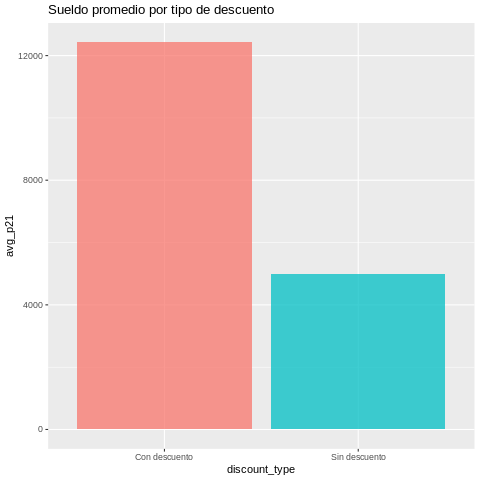

In [59]:
%%R

ggplot(
    data = p21_per_discount,
    aes(x = discount_type, avg_p21, fill = discount_type)
) +
    geom_col(alpha=0.75) +
    labs(title = "Sueldo promedio por tipo de descuento") +
    theme(legend.position = 'none')

#### Representar la distribución del ingreso por ocupación principal (Variable **P21**)  para Asalariados, Cuentapropistas y Patrones (Variable **CAT_OCUP**), con el tipo de gráfico Kernel

In [60]:
%%R

income_per_ocup <- usu %>%
    select(CAT_OCUP, P21) %>%
    mutate(GROUP = case_when(
        CAT_OCUP == 3 ~ 'Asalariados',
        CAT_OCUP == 2 ~ 'Cuentapropistas',
        CAT_OCUP == 1 ~ 'Patrones'
    ))

head(income_per_ocup)

  CAT_OCUP   P21           GROUP
1        3  1500     Asalariados
2        3  9500     Asalariados
3        3  7000     Asalariados
4        3  8000     Asalariados
5        2  6000 Cuentapropistas
6        3 14000     Asalariados


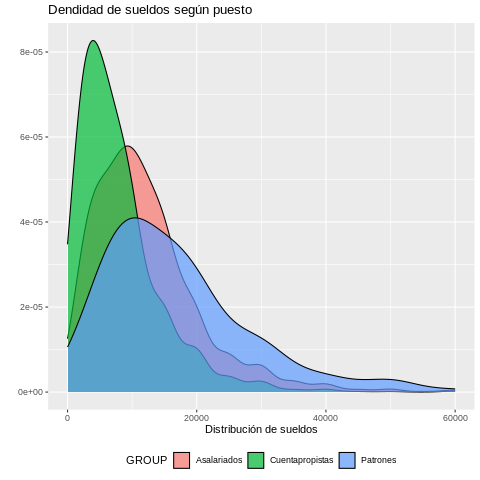

In [61]:
%%R

ggplot(
    income_per_ocup,
    aes(x = P21, group = GROUP, fill = GROUP)
) + geom_density(
    alpha = 0.7,
    adjust = 2
) + scale_x_continuous(
    limits = c(0, 60000)
) + labs(
    x = 'Distribución de sueldos',
    y = '',
    title = 'Dendidad de sueldos según puesto'
) + theme(
    legend.position = 'bottom'
)

En este gráfico, el **límite x** regula el valor máximo a mostrar en el eje X. Un valor mayor harán que se muestren más _outlayers_, y que la diferencia de densidades sea más difícil de ver.

Pese a que el valor recomendado en el enunciado era de 50.000, lo subí a 60.000 para ver la mayor cantidad de datos posible antes de que comiencen a aparecer los valores extremos.

#### (OPCIONAL) Hacer un gráfico boxplot de la distribución de edades de los asalariados con descuento jubilatorio, y de los asalariados sin descuento jubilatorio.

In [62]:
%%R

age_distribution <- usu %>%
    filter(PP07H != 0 & CAT_OCUP == 3) %>%
    select(PP07H, CH06, CAT_OCUP) %>%
    mutate(GROUP = case_when(
        PP07H == 1 ~ 'Con descuento',
        PP07H == 2 ~ 'Sin descuento'
    ))

head(age_distribution)

  PP07H CH06 CAT_OCUP         GROUP
1     2   20        3 Sin descuento
2     1   64        3 Con descuento
3     1   30        3 Con descuento
4     1   24        3 Con descuento
5     2   59        3 Sin descuento
6     1   41        3 Con descuento


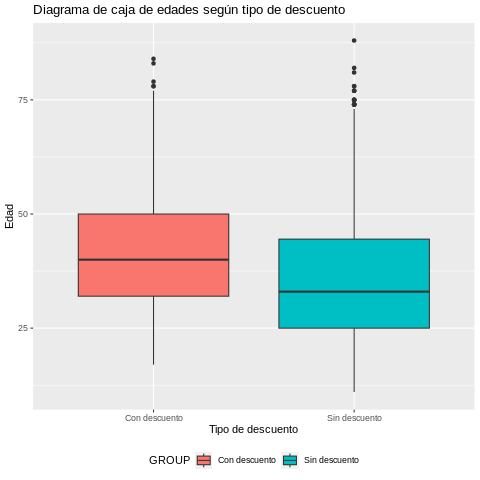

In [65]:
%%R

ggplot(
    age_distribution,
    aes(
        x = GROUP,
        y = CH06,
        fill = GROUP
    )
)   + geom_boxplot() + labs(
            title = 'Diagrama de caja de edades según tipo de descuento',
            x = 'Tipo de descuento',
            y = 'Edad'
    ) + theme(
        legend.position = 'bottom'
    )

#### (OPCIONAL) Calcular el procentaje de asalariados sin descuento jubilatorio como $\frac{Asal. s/ desc jubil}{Asal. c/ desc jubil+ Asal.s/ desc jubil}$. Luego realizar un gráfico de linea con la evolución de este indicador

In [66]:
%%R

discount_evolution <- usu %>%
    filter(CAT_OCUP == 3 | PP07H != 0) %>%
    group_by(CH06) %>%
    summarise(percento = (sum(PP07H == 2) / (sum(PP07H == 2) + sum(PP07H == 1))) * 100)
head(discount_evolution)

# A tibble: 6 × 2
   CH06 percento
  <int>    <dbl>
1    11    100  
2    15    100  
3    16    100  
4    17     91.2
5    18     85  
6    19     72.7


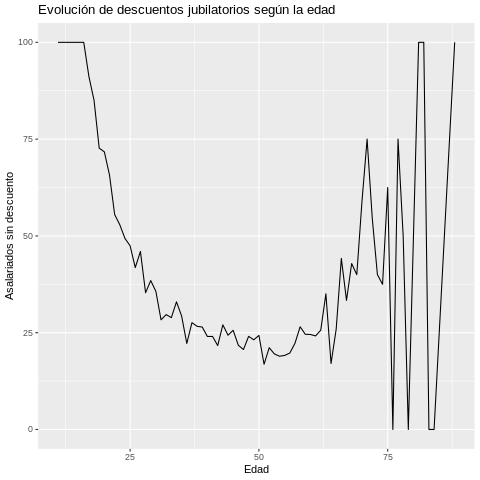

In [68]:
%%R
ggplot(
    discount_evolution,
    aes(
        x = CH06,
        y = percento,
        fill = CH06
    )
) + geom_line() +
    labs(
        x = 'Edad',
        y = 'Asalariados sin descuento',
        title = 'Evolución de descuentos jubilatorios según la edad'
    )

Podemos ver picos y cambios irregulares a partir de la edad ~65, y viendo los puntos extremos en el gráfico anterior, podemos intuir que a partir de dicha edad los datos sean:

* _outlayers_ que no deberían ser tenidos en cuenta
* Insuficientes, pues faltan datos ya que poca población trabaja a partir de los 65 años.